In [1]:
MAIN_DIR = "../output/bigdatacluster/randomizedOutput/"

In [69]:
import os
import pandas as pd
import dill
import json
import numpy as np
import warnings; warnings.simplefilter('ignore')
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [70]:
experiment_folders = [x for x in os.listdir(MAIN_DIR) if os.path.isdir(os.path.join(MAIN_DIR, x))]

In [71]:
experiment_folders, len(experiment_folders)

(['experiment_adj1',
  'experiment_adj10',
  'experiment_adj11',
  'experiment_adj12',
  'experiment_adj13',
  'experiment_adj14',
  'experiment_adj15',
  'experiment_adj16',
  'experiment_adj17',
  'experiment_adj18',
  'experiment_adj19',
  'experiment_adj2',
  'experiment_adj20',
  'experiment_adj21',
  'experiment_adj24',
  'experiment_adj25',
  'experiment_adj26',
  'experiment_adj27',
  'experiment_adj28',
  'experiment_adj29',
  'experiment_adj3',
  'experiment_adj30',
  'experiment_adj31',
  'experiment_adj32',
  'experiment_adj33',
  'experiment_adj34',
  'experiment_adj35',
  'experiment_adj4',
  'experiment_adj5',
  'experiment_adj6',
  'experiment_adj7',
  'experiment_adj8',
  'experiment_adj9'],
 33)

In [72]:
data_dict = defaultdict(list)

In [73]:
for experiment in experiment_folders:
    full_dir = os.path.join(MAIN_DIR, experiment)
    for severity_dir in [x for x in os.listdir(full_dir) if os.path.isdir(os.path.join(full_dir, x))]:
        full_seve_dir = os.path.join(full_dir, severity_dir, f"AgebetweenNonetNone_{severity_dir}_percentile_minmax")
        for beh_dir in [x for x in os.listdir(full_seve_dir) if os.path.isdir(os.path.join(full_seve_dir, x))]:
            full_beh_dir = os.path.join(full_seve_dir, beh_dir)
            
            df_pseudo = pd.read_csv(os.path.join(full_beh_dir, "pseudo_metrics.csv"))
            df_pseudo['avg'] = df_pseudo[['acc','f1']].mean(axis=1)
            best_rfe, best_clc = df_pseudo[['RFE','Metrics']].iloc[df_pseudo['avg'].argmax()]
            
            with open(os.path.join(full_beh_dir, "selected_feats.json"), 'r') as f:
                rfe_dict = json.load(f)
            feats = rfe_dict[best_rfe]
            
            with open(os.path.join(full_beh_dir, "ML_obj.p"), 'rb') as f:
                ML_obj = dill.load(f)
            
            clc = ML_obj[best_rfe][best_clc]
            data_dict['exp'].append(experiment)
            data_dict['sev'].append(severity_dir)
            data_dict['beh'].append(beh_dir.split('_')[-1])
            data_dict['rfe'].append(best_rfe)
            data_dict['clc'].append(best_clc)
            data_dict['feats'].append(feats)
            data_dict['hyper_params'].append(clc.best_params_)
            data_dict['clc_score'].append(clc.best_score_)
            data_dict['pseudo_acc'].append(df_pseudo['acc'].iloc[df_pseudo['avg'].argmax()])
            data_dict['pseudo_f1'].append(df_pseudo['f1'].iloc[df_pseudo['avg'].argmax()])
            

            
df_results = pd.DataFrame(data_dict)

In [79]:
df_results.shape

(504, 10)

In [80]:
df_results

,exp,sev,beh,rfe,clc,feats,hyper_params,clc_score,pseudo_acc,pseudo_f1
0,experiment_adj1,mild_TD,awa,lsvm,svm,"[area_lentorhinal_PERC60, area_lfusiform_PERC6...","{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.860529,0.932692,0.740741
1,experiment_adj1,mild_TD,cog,lsvm,lsvm,"[area_lcaudalanteriorcingulate_PERC20, area_lc...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.884848,0.980000,0.909091
2,experiment_adj1,mild_TD,comm,lsvm,lsvm,"[area_lbankssts_PERC60, area_lcaudalmiddlefron...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.858837,0.968750,0.842105
3,experiment_adj1,mild_TD,man,lsvm,lr,"[area_lcaudalmiddlefrontal_PERC60, area_lfront...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.916667,0.978495,0.888889
4,experiment_adj1,mild_TD,mot,lgbm,lgbm,"[area_lbankssts_PERC40, area_lcaudalanteriorci...","{'reg_lambda': 0.7000000000000001, 'reg_alpha'...",0.613217,0.901961,0.375000
...,...,...,...,...,...,...,...,...,...,...
499,experiment_adj9,sever_TD,cog,lsvm,lsvm,"[area_lcaudalanteriorcingulate_PERC60, area_lc...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.866220,0.938596,0.851064
500,experiment_adj9,sever_TD,comm,lsvm,lr,"[area_lcaudalanteriorcingulate_PERC80, area_lc...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.875782,0.907563,0.830769
501,experiment_adj9,sever_TD,man,lsvm,lsvm,"[area_lcaudalanteriorcingulate_PERC80, area_lc...","{'penalty': 'l2', 'loss': 'squared_hinge', 'C'...",0.872691,0.909091,0.840580
502,experiment_adj9,sever_TD,mot,lsvm,lr,"[area_lcaudalmiddlefrontal_PERC20, area_lcuneu...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.875183,0.930435,0.809524


# Pick the best trial for severity and behavioral models to be used for production (Phase II)

In [99]:
def get_best_severity_behavioral(df, sev, beh):
    sub_df = df[(df['sev']==sev)&(df['beh']==beh)]
    sub_df['tot'] =  sub_df['clc_score']+ sub_df['pseudo_acc'] 
    return sub_df.iloc[sub_df['tot'].argmax()]
        

In [107]:
# Optimize wrt to the number of features
def get_best_severity_behavioral(df, sev, beh):
    sub_df = df[(df['sev']==sev)&(df['beh']==beh)]
    sub_df['tot'] =  (sub_df['clc_score']+ sub_df['pseudo_acc'] + sub_df['pseudo_f1'])/3 - len(sub_df['feats'])/1088
    return sub_df.iloc[sub_df['tot'].argmax()]
        

In [108]:
best_data_dict = defaultdict(dict)
for sev in ['mild_TD', 'moderate_TD', 'sever_TD']:
    for beh in ['awa','comm','man','cog','mot', 'tot']:
        best_data_dict[sev][beh] = get_best_severity_behavioral(df_results, sev, beh).to_dict()

In [109]:
with open('best_results_dict.json', 'w') as f:
    json.dump(best_data_dict, f)

In [106]:
len(best_data_dict['mild_TD']['cog']['feats']),best_data_dict['mild_TD']['cog']['clc_score'], best_data_dict['mild_TD']['cog']['pseudo_f1']

(141, 0.9625, 0.9166666666666666)

# `severity_dict` is the base of the analysis 

# Question #1  

In [23]:
df_results.groupby('sev')[['clc_score','pseudo_acc', 'pseudo_f1']].mean()

,clc_score,pseudo_acc,pseudo_f1
sev,,,
mild_TD,0.807724,0.950365,0.746540
moderate_TD,0.791393,0.902976,0.723463
sever_TD,0.821807,0.889343,0.768660


In [64]:
df_results.groupby('sev')[['clc_score','pseudo_acc', 'pseudo_f1']].max()

,clc_score,pseudo_acc,pseudo_f1
sev,,,
mild_TD,0.975397,1.000000,1.000000
moderate_TD,0.926419,0.980583,0.950000
sever_TD,0.907761,0.965217,0.914286


In [72]:
df_results[df_results['sev']=='mild_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1"), df_results[df_results['sev']=='mild_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].std().sort_values(by="pseudo_f1")

(      clc_score  pseudo_acc  pseudo_f1
 beh                                   
 mot    0.715832    0.925245   0.579821
 comm   0.725616    0.916667   0.594613
 awa    0.822882    0.941106   0.748138
 man    0.844172    0.966398   0.809436
 cog    0.884659    0.976250   0.897069
 tot    0.860959    0.990591   0.928821,
       clc_score  pseudo_acc  pseudo_f1
 beh                                   
 cog    0.067404    0.015980   0.073865
 tot    0.061392    0.012107   0.097168
 man    0.077426    0.019438   0.111573
 comm   0.113848    0.032466   0.146461
 mot    0.130388    0.025639   0.168522
 awa    0.111116    0.032277   0.173435)

In [70]:
df_results[df_results['sev']=='moderate_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1")

,clc_score,pseudo_acc,pseudo_f1
beh,,,
awa,0.748909,0.863532,0.600882
mot,0.750832,0.866304,0.644425
comm,0.808881,0.903302,0.732130
cog,0.788693,0.924769,0.779233
tot,0.827745,0.931604,0.804481
man,0.835560,0.935680,0.819339


In [71]:
df_results[df_results['sev']=='sever_TD'].groupby('beh')[['clc_score','pseudo_acc', 'pseudo_f1']].mean().sort_values(by="pseudo_f1")

,clc_score,pseudo_acc,pseudo_f1
beh,,,
awa,0.852750,0.901136,0.717578
tot,0.796316,0.847561,0.746961
comm,0.840792,0.870798,0.774083
cog,0.813304,0.911184,0.792893
mot,0.827635,0.931522,0.824504
man,0.838471,0.900826,0.825419


In [73]:
df_results

,exp,sev,beh,rfe,clc,feats,hyper_params,clc_score,pseudo_acc,pseudo_f1
0,experiment_adj24,mild_TD,awa,lsvm,lsvm,"[area_lentorhinal_PERC60, area_lfusiform_PERC6...","{'penalty': 'l2', 'loss': 'hinge', 'C': 10}",0.889666,0.942308,0.769231
1,experiment_adj24,mild_TD,cog,lsvm,lr,"[area_lmiddletemporal_PERC60, area_lparsopercu...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.737500,0.940000,0.727273
2,experiment_adj24,mild_TD,comm,lsvm,svm,"[area_lentorhinal_PERC80, area_lfusiform_PERC6...","{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.720834,0.927083,0.695652
3,experiment_adj24,mild_TD,man,lr,lr,"[area_lbankssts_PERC60, area_lcaudalmiddlefron...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.774798,0.946237,0.705882
4,experiment_adj24,mild_TD,mot,lsvm,lr,"[area_lentorhinal_PERC60, area_linferiorpariet...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.841129,0.970588,0.869565
...,...,...,...,...,...,...,...,...,...,...
139,experiment_adj31,sever_TD,cog,lr,svm,"[area_lcaudalanteriorcingulate_PERC40, area_le...","{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.795850,0.929825,0.840000
140,experiment_adj31,sever_TD,comm,lsvm,lsvm,"[area_lcaudalanteriorcingulate_PERC80, area_lc...","{'penalty': 'l2', 'loss': 'hinge', 'C': 5}",0.903436,0.890756,0.805970
141,experiment_adj31,sever_TD,man,lr,ridge,"[area_lbankssts_PERC60, area_lcaudalanteriorci...","{'normalize': False, 'alpha': 0.2}",0.793503,0.900826,0.812500
142,experiment_adj31,sever_TD,mot,lsvm,lr,"[area_linsula_PERC80, area_listhmuscingulate_P...","{'solver': 'newton-cg', 'penalty': 'none', 'C'...",0.801613,0.930435,0.826087


<AxesSubplot:ylabel='Frequency'>

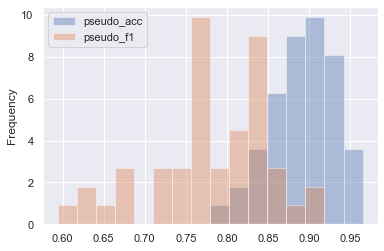

In [89]:
df_results[df_results['sev']=='sever_TD'][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

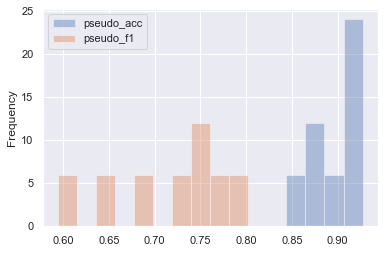

In [91]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='awa')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

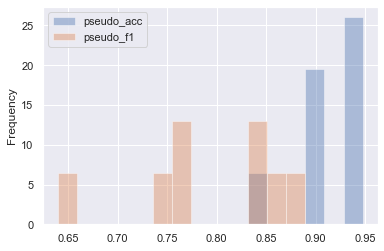

In [92]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='cog')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

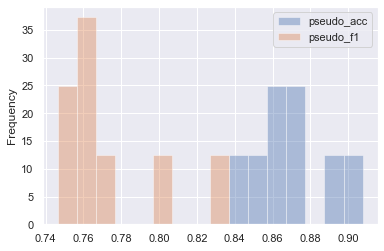

In [93]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='comm')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

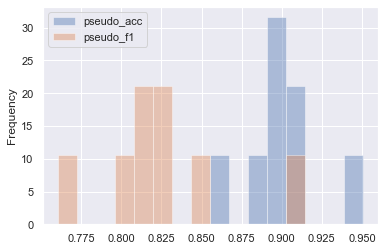

In [94]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='man')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

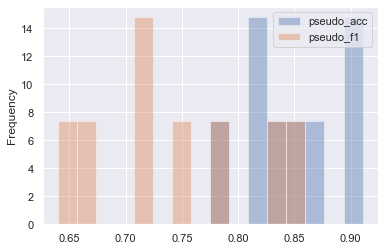

In [95]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='tot')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

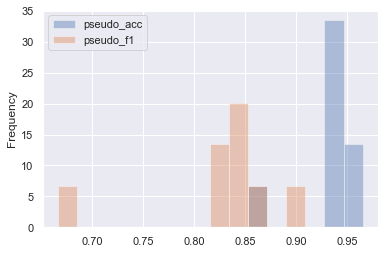

In [96]:
df_results[(df_results['sev']=='sever_TD')&(df_results['beh']=='mot')][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

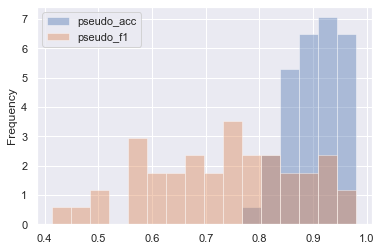

In [87]:
df_results[df_results['sev']=='moderate_TD'][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)

<AxesSubplot:ylabel='Frequency'>

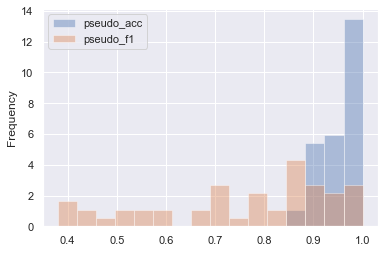

In [90]:
df_results[df_results['sev']=='mild_TD'][['pseudo_acc', 'pseudo_f1']].plot.hist(bins=16, density=True, alpha=0.4)